## Data Load

In [1]:
import pandas as pd
import matplotlib.pyplot as pltb
import seaborn as sns

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load data from CSV file and parse date columns
df = pd.read_csv("drive/MyDrive/Call Options Alert System/Cleaned_data_aapl.csv", parse_dates=['QUOTE_DATE', 'QUOTE_READTIME', 'EXPIRE_DATE'])

# List of columns related to put options that you want to remove
put_columns_to_remove = [
    'P_BID', 'P_ASK', 'P_SIZE', 'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV', 'P_VOLUME', 'QUOTE_UNIXTIME','QUOTE_READTIME', 'QUOTE_TIME_HOURS'
]

# Drop the specified put-related columns
df = df.drop(columns=put_columns_to_remove)

# Now, 'df' contains only columns related to call options and the columns that were not removed


## Plots

In [ ]:
# Create the plot for call option prices
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot call option prices
plt.plot(df['QUOTE_DATE'], df['C_LAST'], label='Call Option Prices', color='blue')

# Customize the plot
plt.title('Call Option Prices Over Time')
plt.xlabel('Quote Date')
plt.ylabel('Call Option Price')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

NameError: ignored

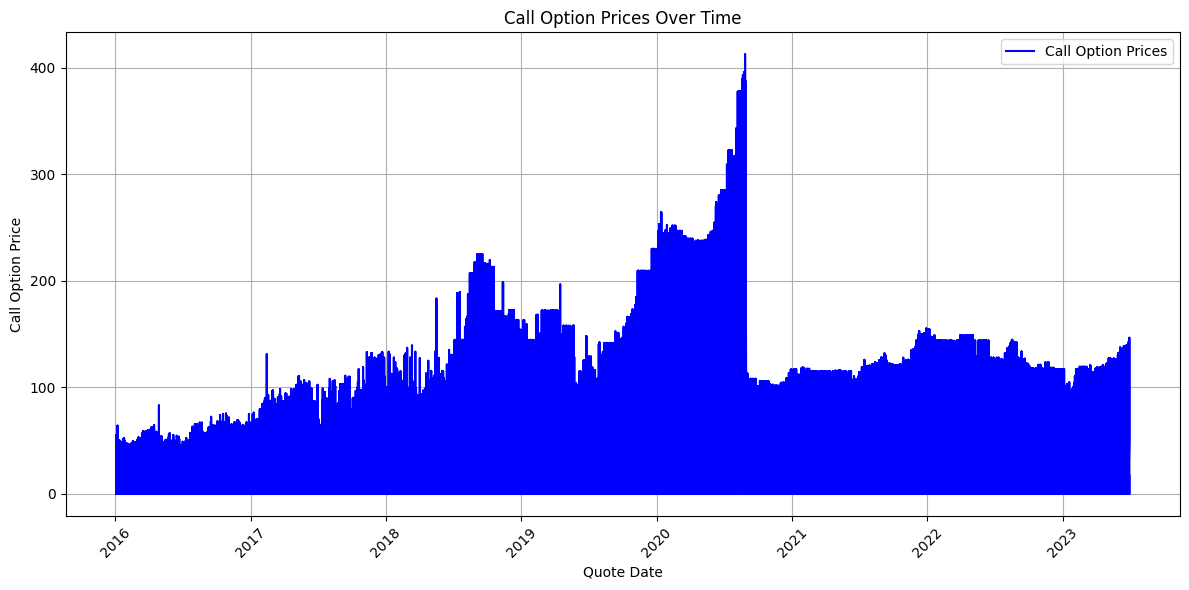

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'QUOTE_DATE' and 'C_LAST' columns

# # Convert 'QUOTE_DATE' to a pandas datetime object with error handling
# df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], format='%Y-%m-%d', errors='coerce')

# # Remove rows with NaT (invalid date) values
# df = df.dropna(subset=['QUOTE_DATE'])

# # Ensure 'C_LAST' column contains numeric values (convert if needed)
# df['C_LAST'] = pd.to_numeric(df['C_LAST'], errors='coerce')

# # Remove rows with non-numeric 'C_LAST' values
# df = df.dropna(subset=['C_LAST'])

# # Sort the DataFrame by 'QUOTE_DATE'
# df.sort_values(by='QUOTE_DATE', inplace=True)

# Create the plot for call option prices
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot call option prices
plt.plot(df['QUOTE_DATE'], df['C_LAST'], label='Call Option Prices', color='blue')

# Customize the plot
plt.title('Call Option Prices Over Time')
plt.xlabel('Quote Date')
plt.ylabel('Call Option Price')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

# Explore Contracts: Strike Prices and Count

In [ ]:
# Assuming 'df' is your DataFrame

# Count the number of unique contracts based on the 'STRIKE' column
num_unique_contracts = df['STRIKE'].nunique()

print("Number of unique contracts:", num_unique_contracts)

Number of unique contracts: 450


In [ ]:
# Count the number of contracts for the specified STRIKE price
num_contracts = df[df['STRIKE'] == target_strike]['STRIKE'].count()

print("Number of contracts for STRIKE price", target_strike, ":", num_contracts)

Number of contracts for STRIKE price 150.0 : 25955


In [ ]:
pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21120 sha256=f19745f06bbb406b948588e650eaec158fd37f21f31af2861450269dbdcaad20
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


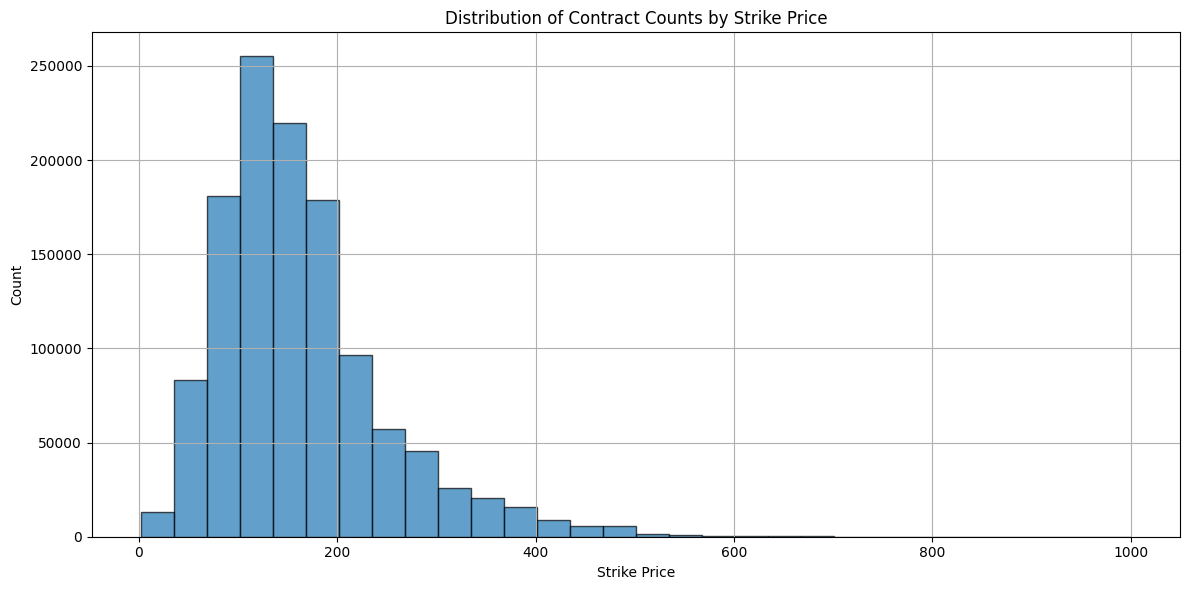

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram to show the distribution of contract counts
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot a histogram of the strike prices
plt.hist(df['STRIKE'], bins=30, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('Distribution of Contract Counts by Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Count')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


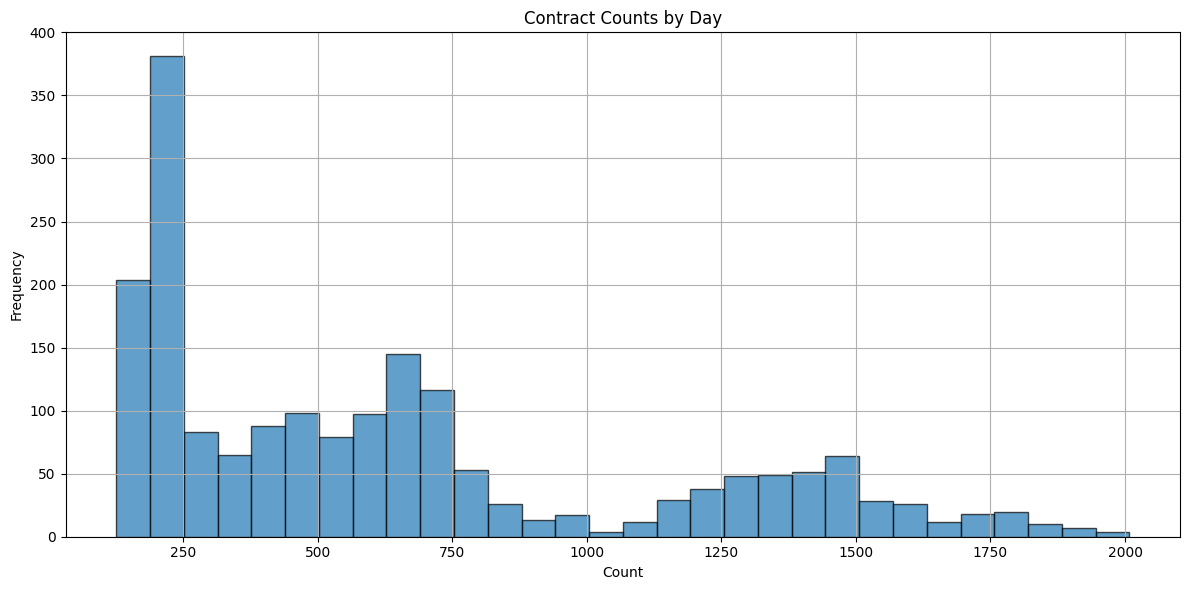

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar plot to show contract counts by day
plt.figure(figsize=(12, 6))  # Set the figure size

# Group the data by 'QUOTE_DATE' and count the number of contracts for each day
contract_counts_by_day = df.groupby(df['QUOTE_DATE'].dt.date)['STRIKE'].count()

# Plot the contract counts by day
plt.hist(contract_counts_by_day.values, bins=30, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('Contract Counts by Day')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


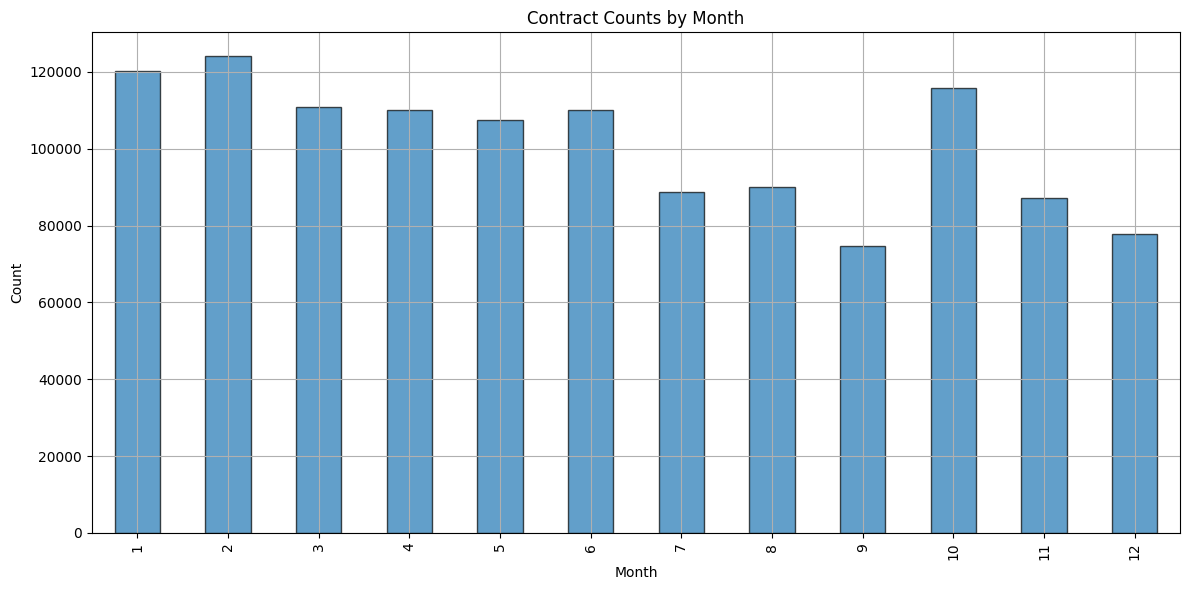

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart to show contract counts by month
plt.figure(figsize=(12, 6))  # Set the figure size

# Extract the month from 'QUOTE_DATE' and create a new column 'QUOTE_MONTH'
df['QUOTE_MONTH'] = df['QUOTE_DATE'].dt.month

# Group the data by 'QUOTE_MONTH' and count the number of contracts for each month
contract_counts_by_month = df.groupby('QUOTE_MONTH')['STRIKE'].count()

# Plot the contract counts by month using a bar chart
contract_counts_by_month.plot(kind='bar', edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('Contract Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


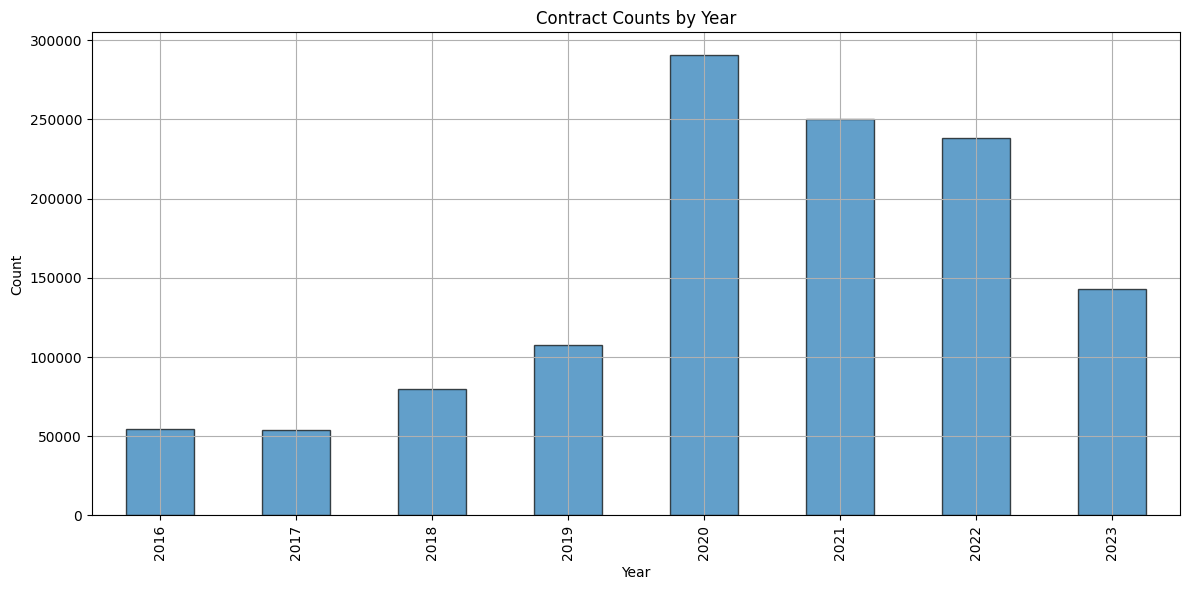

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart to show contract counts by year
plt.figure(figsize=(12, 6))  # Set the figure size

# Extract the year from 'QUOTE_DATE' and create a new column 'QUOTE_YEAR'
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Group the data by 'QUOTE_YEAR' and count the number of contracts for each year
contract_counts_by_year = df.groupby('QUOTE_YEAR')['STRIKE'].count()

# Plot the contract counts by year using a bar chart
contract_counts_by_year.plot(kind='bar', edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('Contract Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


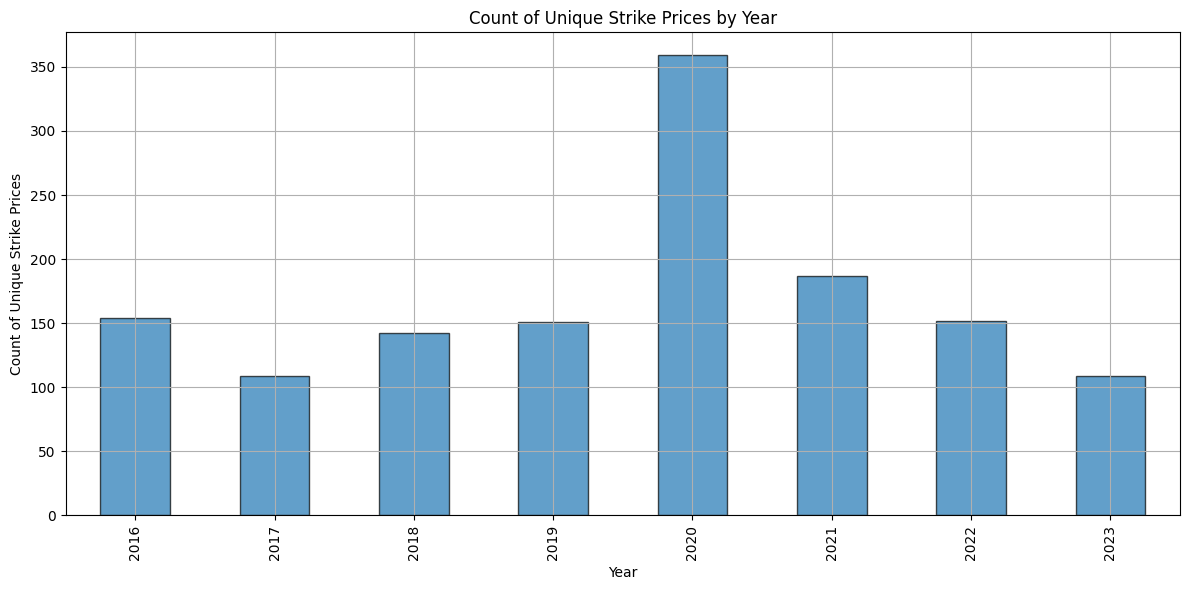

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart to show the count of unique strike prices for each year
plt.figure(figsize=(12, 6))  # Set the figure size

# Extract the year from 'QUOTE_DATE' and create a new column 'QUOTE_YEAR'
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Group the data by 'QUOTE_YEAR' and count the number of unique strike prices for each year
unique_strike_counts_by_year = df.groupby('QUOTE_YEAR')['STRIKE'].nunique()

# Plot the count of unique strike prices by year using a bar chart
unique_strike_counts_by_year.plot(kind='bar', edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('Count of Unique Strike Prices by Year')
plt.xlabel('Year')
plt.ylabel('Count of Unique Strike Prices')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


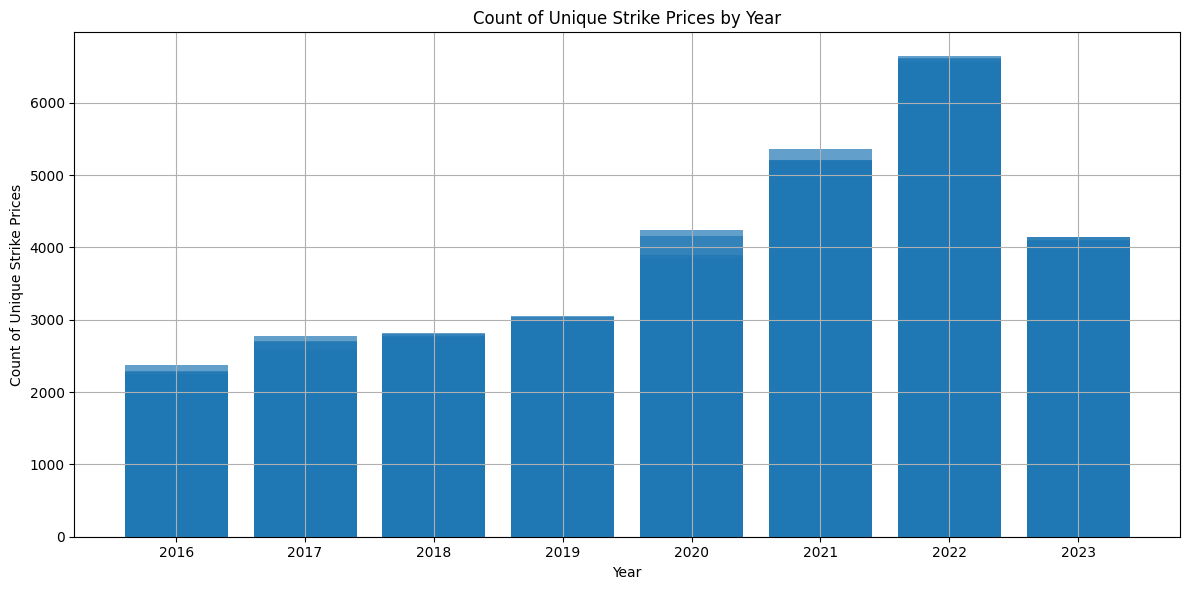

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the year from 'QUOTE_DATE' and create a new column 'QUOTE_YEAR'
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Group the data by 'QUOTE_YEAR' and 'STRIKE', then count the occurrences
strike_counts_by_year = df.groupby(['QUOTE_YEAR', 'STRIKE']).size().reset_index(name='COUNT')

# Create a bar chart to show the count of unique strike prices for each year
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the count of unique strike prices by year using a bar chart
plt.bar(strike_counts_by_year['QUOTE_YEAR'], strike_counts_by_year['COUNT'], alpha=0.7)

# Customize the plot
plt.title('Count of Unique Strike Prices by Year')
plt.xlabel('Year')
plt.ylabel('Count of Unique Strike Prices')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()



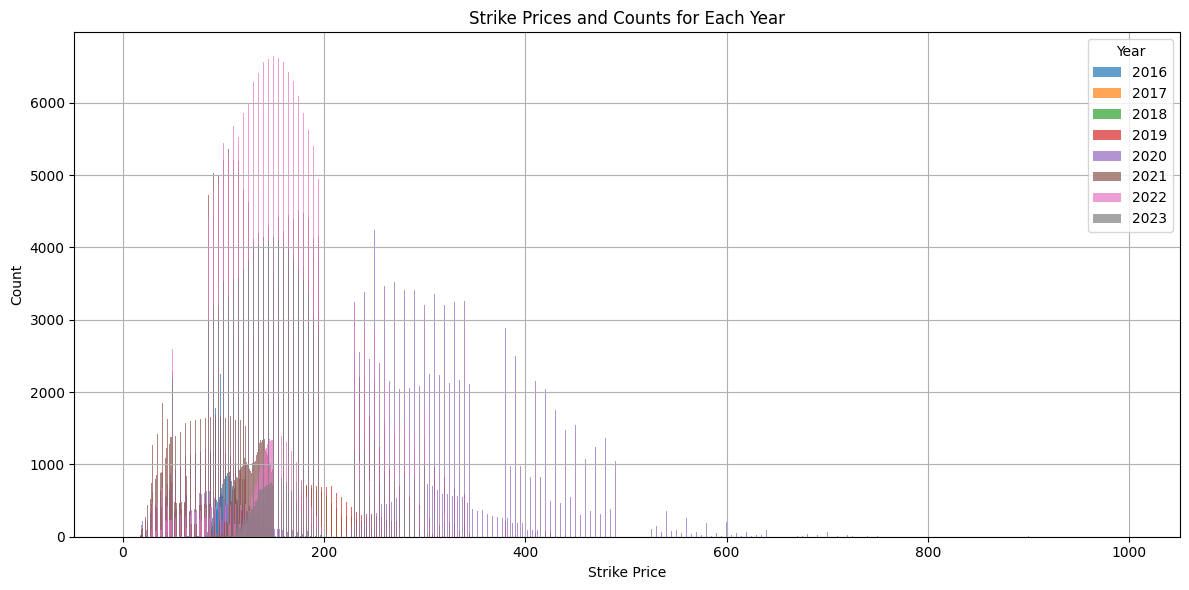

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year from 'QUOTE_DATE' and create a new column 'QUOTE_YEAR'
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Group the data by 'QUOTE_YEAR' and 'STRIKE', then count the occurrences
strike_counts_by_year = df.groupby(['QUOTE_YEAR', 'STRIKE']).size().reset_index(name='COUNT')

# Get unique years from the data
years = strike_counts_by_year['QUOTE_YEAR'].unique()

# Create a grouped bar chart for strike prices and counts for each year
plt.figure(figsize=(12, 6))  # Set the figure size

# Iterate through years and plot strike prices and counts
for year in years:
    data_year = strike_counts_by_year[strike_counts_by_year['QUOTE_YEAR'] == year]
    plt.bar(data_year['STRIKE'], data_year['COUNT'], label=str(year), alpha=0.7)

# Customize the plot
plt.title('Strike Prices and Counts for Each Year')
plt.xlabel('Strike Price')
plt.ylabel('Count')
plt.legend(title='Year')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


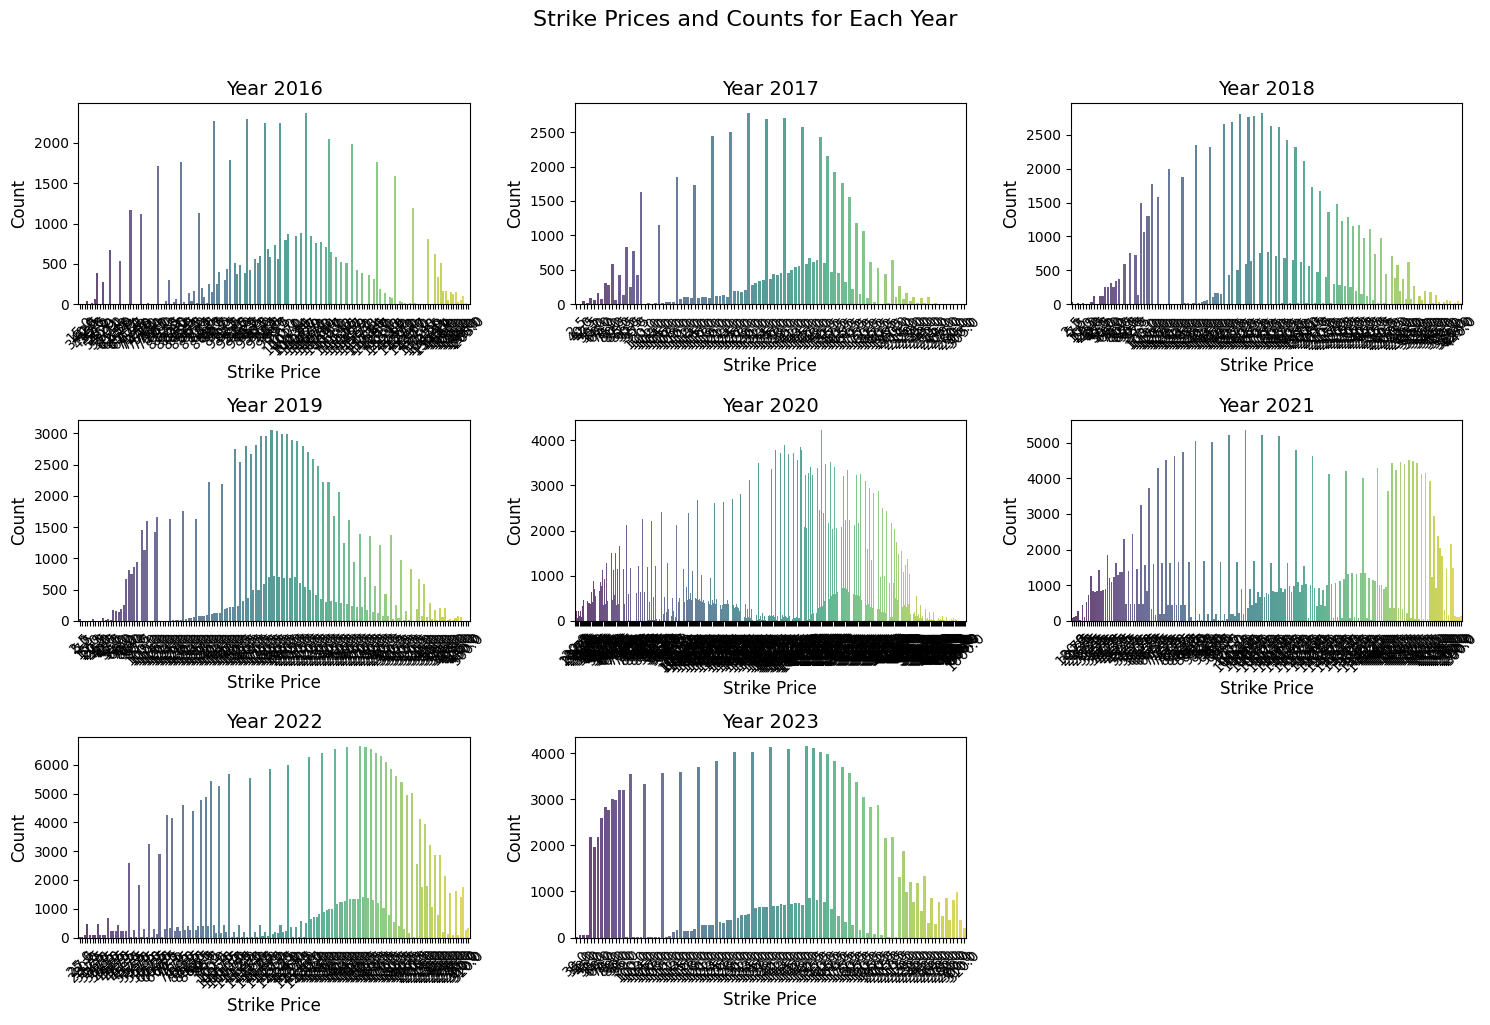

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'QUOTE_DATE' and create a new column 'QUOTE_YEAR'
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Group the data by 'QUOTE_YEAR' and 'STRIKE', then count the occurrences
strike_counts_by_year = df.groupby(['QUOTE_YEAR', 'STRIKE']).size().reset_index(name='COUNT')

# Get unique years from the data
years = strike_counts_by_year['QUOTE_YEAR'].unique()

# Set the number of columns for subplots
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (len(years) + num_cols - 1) // num_cols

# Create subplots with Seaborn style
plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    data_year = strike_counts_by_year[strike_counts_by_year['QUOTE_YEAR'] == year]
    plt.subplot(num_rows, num_cols, i + 1)
    sns.barplot(data=data_year, x='STRIKE', y='COUNT', palette='viridis', alpha=0.8)
    plt.title(f'Year {year}', fontsize=14)
    plt.xlabel('Strike Price', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Remove any empty subplots
if len(years) < num_cols * num_rows:
    for i in range(len(years), num_cols * num_rows):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))

# Add a main title
plt.suptitle('Strike Prices and Counts for Each Year', fontsize=16, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


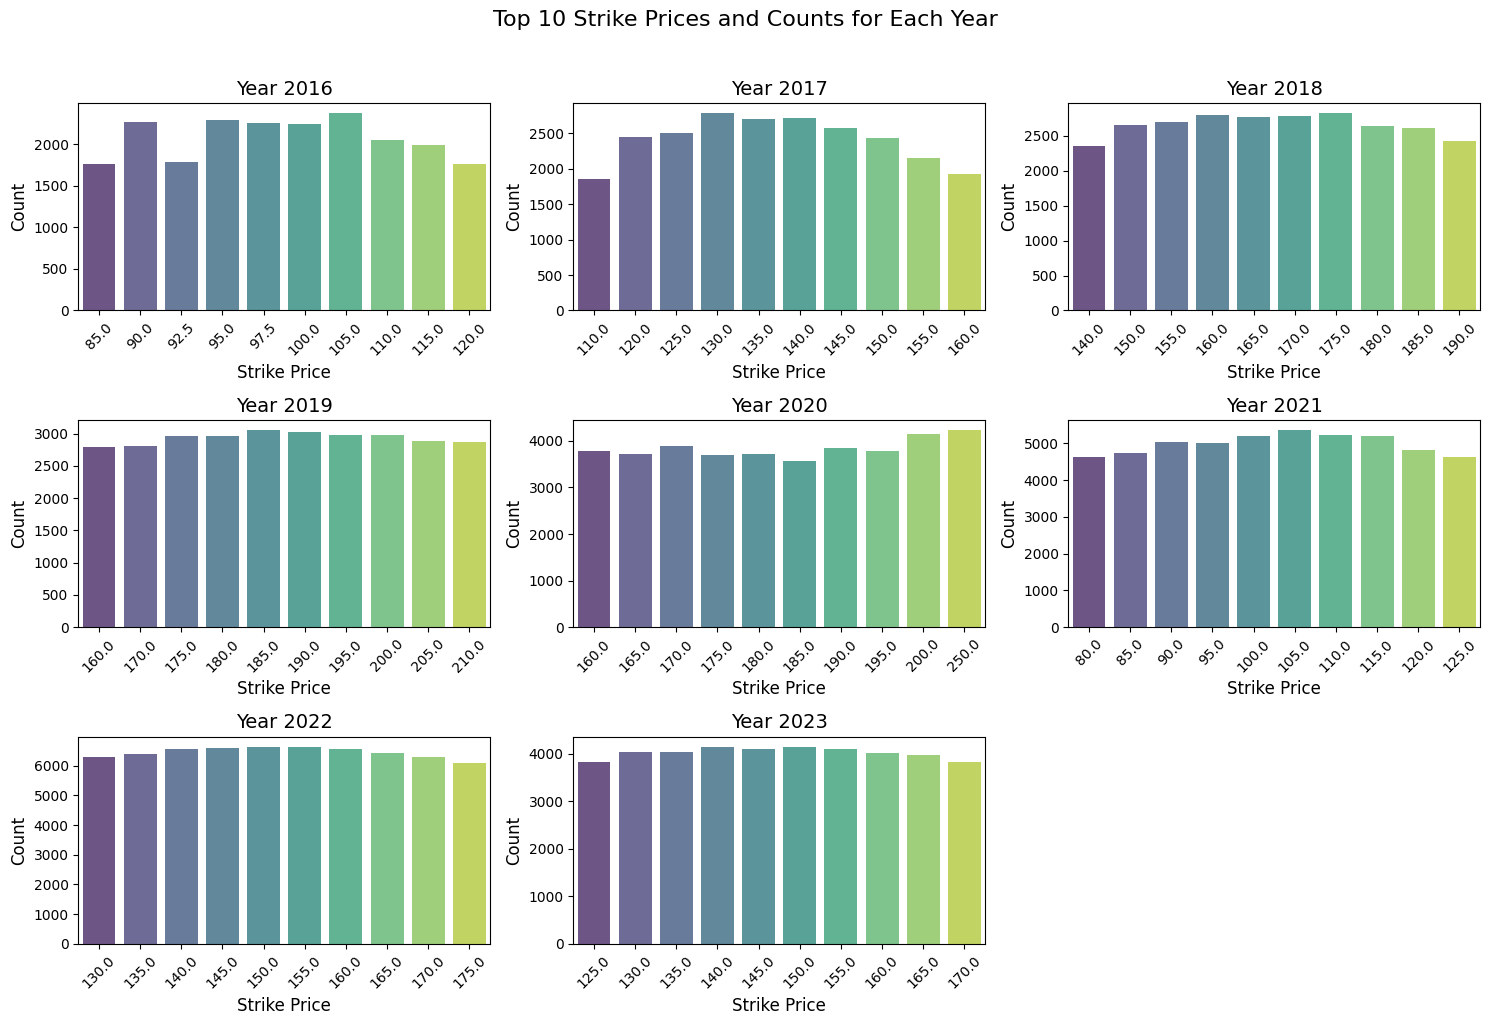

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (you can replace this with your loaded data)
# df = ...

# Extract the year from 'QUOTE_DATE' and create a new column 'QUOTE_YEAR'
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Group the data by 'QUOTE_YEAR' and 'STRIKE', then count the occurrences
strike_counts_by_year = df.groupby(['QUOTE_YEAR', 'STRIKE']).size().reset_index(name='COUNT')

# Get unique years from the data
years = strike_counts_by_year['QUOTE_YEAR'].unique()

# Set the number of columns for subplots
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (len(years) + num_cols - 1) // num_cols

# Create subplots with Seaborn style
plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    data_year = strike_counts_by_year[strike_counts_by_year['QUOTE_YEAR'] == year]

    # Filter and display a subset of strike prices (e.g., top 10)
    top_strike_prices = data_year.sort_values(by='COUNT', ascending=False).head(10)

    plt.subplot(num_rows, num_cols, i + 1)
    sns.barplot(data=top_strike_prices, x='STRIKE', y='COUNT', palette='viridis', alpha=0.8)
    plt.title(f'Year {year}', fontsize=14)
    plt.xlabel('Strike Price', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Remove any empty subplots
if len(years) < num_cols * num_rows:
    for i in range(len(years), num_cols * num_rows):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))

# Add a main title
plt.suptitle('Top 10 Strike Prices and Counts for Each Year', fontsize=16, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Sample data (you can replace this with your loaded data)
# df = ...

# Group the data by 'STRIKE' and count the occurrences
strike_counts = df['STRIKE'].value_counts().reset_index()
strike_counts.columns = ['STRIKE', 'COUNT']

# Display the table of strike prices and their counts
strike_counts.head(25)


,STRIKE,COUNT
0,160.0,26287
1,155.0,26062
2,150.0,25955
3,145.0,25903
4,165.0,25833
5,140.0,25716
6,170.0,25703
7,175.0,25110
8,130.0,24875
9,120.0,24617


# Explore Contracts: Strike Prices and Volume

In [ ]:

# Sample data (you can replace this with your loaded data)
# df = ...

# Create a bar chart of strike prices and call option volumes
plt.figure(figsize=(12, 6))
plt.bar(df['STRIKE'], df['C_VOLUME'], color='skyblue', edgecolor='black')

# Set axis labels and title
plt.xlabel('Strike Price')
plt.ylabel('Call Option Volume (C_VOLUME)')
plt.title('Call Option Volume by Strike Price')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (you can replace this with your loaded data)
# df = ...

# Create a histogram to show the distribution of call option volumes by strike price
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot a histogram of call option volumes (C_VOLUME) by strike price
plt.hist(df['C_VOLUME'], bins=30, edgecolor='k', alpha=0.7, color='skyblue')

# Customize the plot
plt.title('Distribution of Call Option Volumes by Strike Price')
plt.xlabel('Call Option Volume (C_VOLUME)')
plt.ylabel('Count')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Sample data (you can replace this with your loaded data)
# df = ...

# Extract the year from the 'QUOTE_DATE' column and create a new 'QUOTE_YEAR' column
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'])  # Ensure 'QUOTE_DATE' is in datetime format
df['QUOTE_YEAR'] = df['QUOTE_DATE'].dt.year

# Create a new DataFrame with 'STRIKE', 'QUOTE_YEAR', and 'C_VOLUME'
strike_volume_df = df[['STRIKE', 'QUOTE_YEAR', 'C_VOLUME']]

# Group the data by 'STRIKE' and 'QUOTE_YEAR', and calculate the sum of 'C_VOLUME' for each combination
strike_volume_sum = strike_volume_df.groupby(['STRIKE', 'QUOTE_YEAR'])['C_VOLUME'].sum().reset_index()

# Sort the DataFrame by 'C_VOLUME' in descending order
sorted_df = strike_volume_sum.sort_values(by='C_VOLUME', ascending=False)

# Select the top N strike prices (e.g., top 10)
top_strike_prices = sorted_df.head(10)

# Print the list of top strike prices, along with year and volume
print("Top Strike Prices by Call Option Volume:")
print(top_strike_prices)


Top Strike Prices by Call Option Volume:
     STRIKE  QUOTE_YEAR   C_VOLUME
920   175.0        2022  9102623.0
902   170.0        2022  8854909.0
938   180.0        2022  6435849.0
867   160.0        2022  6375445.0
885   165.0        2022  6326729.0
831   150.0        2022  5447048.0
849   155.0        2022  5179374.0
911   172.5        2022  5097332.0
929   177.5        2022  3421936.0
886   165.0        2023  3326474.0


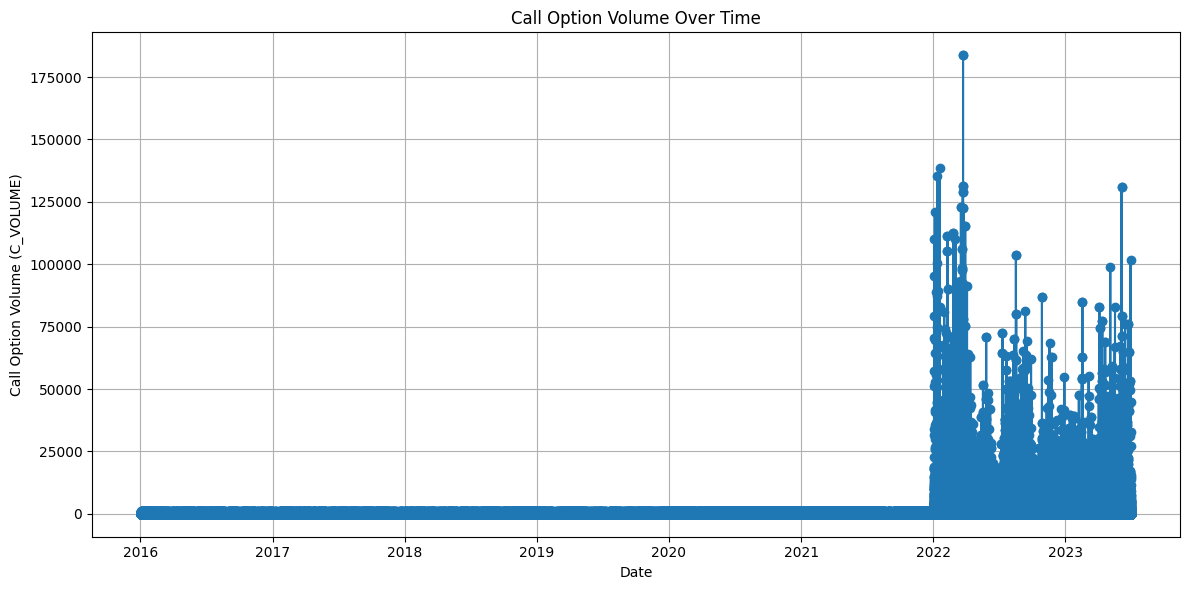

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (you can replace this with your loaded data)
# df = ...

# Ensure 'QUOTE_DATE' is in datetime format
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'])

# Create a line plot of call option volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['QUOTE_DATE'], df['C_VOLUME'], marker='o', linestyle='-')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Call Option Volume (C_VOLUME)')
plt.title('Call Option Volume Over Time')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()



In [13]:
# Calculate summary statistics for call option volume prior to 2022
summary_stats = df_prior_to_2022['C_VOLUME'].describe()
print(summary_stats)


count    836213.000000
mean         90.134071
std         174.069181
min           0.000000
25%           2.000000
50%          13.000000
75%          84.000000
max         999.000000
Name: C_VOLUME, dtype: float64


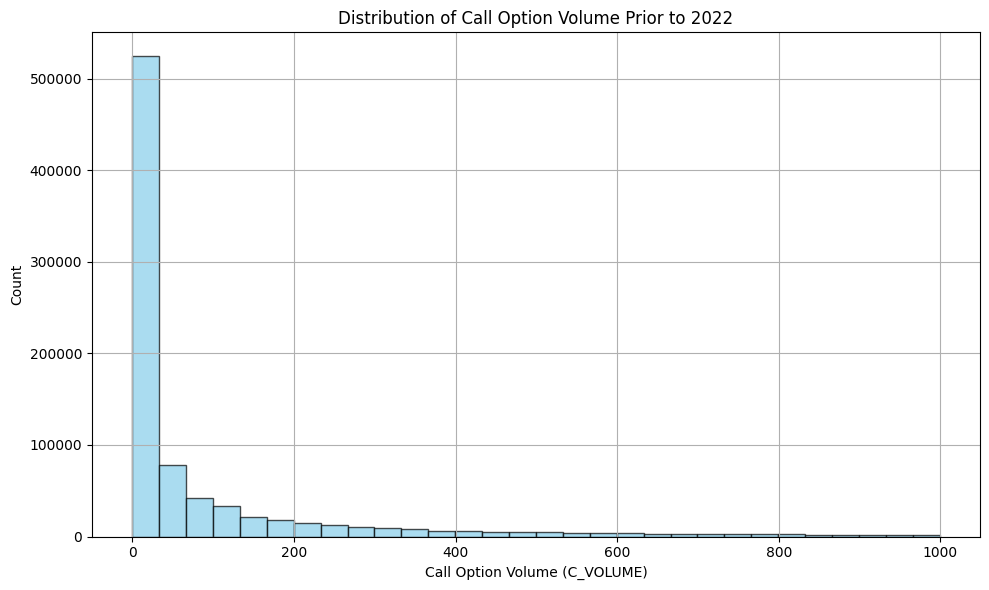

In [16]:
# Create a histogram to visualize the distribution of call option volume
plt.figure(figsize=(10, 6))
plt.hist(df_prior_to_2022['C_VOLUME'], bins=30, edgecolor='k', alpha=0.7, color='skyblue')
plt.xlabel('Call Option Volume (C_VOLUME)')
plt.ylabel('Count')
plt.title('Distribution of Call Option Volume Prior to 2022')
plt.grid()
plt.tight_layout()
plt.show()
